# S3-P1-U1-AC-03 — Análisis de Series Temporales y Fenómenos Climáticos

**Dataset:** *Weather in Szeged (2006–2016)*  
**Objetivo:** practicar carga, limpieza, visualización, *resampling* y correlación de variables meteorológicas.

> Nota: Este notebook asume que el archivo se llama **`weatherHistory.csv`** y está en la misma carpeta que este `.ipynb`.


## 1) Configuración y carga de datos
En datos climáticos con series temporales es clave convertir la fecha a `datetime` y usarla como índice para facilitar consultas y *resampling*.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carga del dataset
df = pd.read_csv("weatherHistory.csv")

# Conversión de fecha a datetime (incluye zona horaria)
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)

# Establecer índice temporal
df.set_index("Formatted Date", inplace=True)

df.head()


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Descripción rápida del dataset
- Revisión de tipos de dato
- Estadísticas descriptivas
- Lista de columnas


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [3]:
df.describe(include="all")


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [4]:
list(df.columns)


['Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

## 2) Limpieza y filtrado de ruido
Se eliminan columnas administrativas o con poca variabilidad (ruido) y se revisan valores nulos/duplicados.

In [5]:
# Eliminar columnas que no se usarán en el análisis (si existen)
cols_to_drop = ["Loud Cover", "Daily Summary"]
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# Nulos por columna
df.isnull().sum().sort_values(ascending=False).head(15)


Precip Type                 517
Summary                       0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [6]:
# Decisión: eliminar filas con nulos (para evitar distorsión en gráficas/correlación)
df = df.dropna()

# Duplicados (si existieran)
dup_count = df.duplicated().sum()
dup_count


np.int64(72)

In [7]:
# Si hubiera duplicados, los eliminamos
df = df.drop_duplicates()
df.shape


(95864, 9)

## 3) Temperatura real vs. sensación térmica
Gráfico de líneas con una muestra de registros para que sea legible.

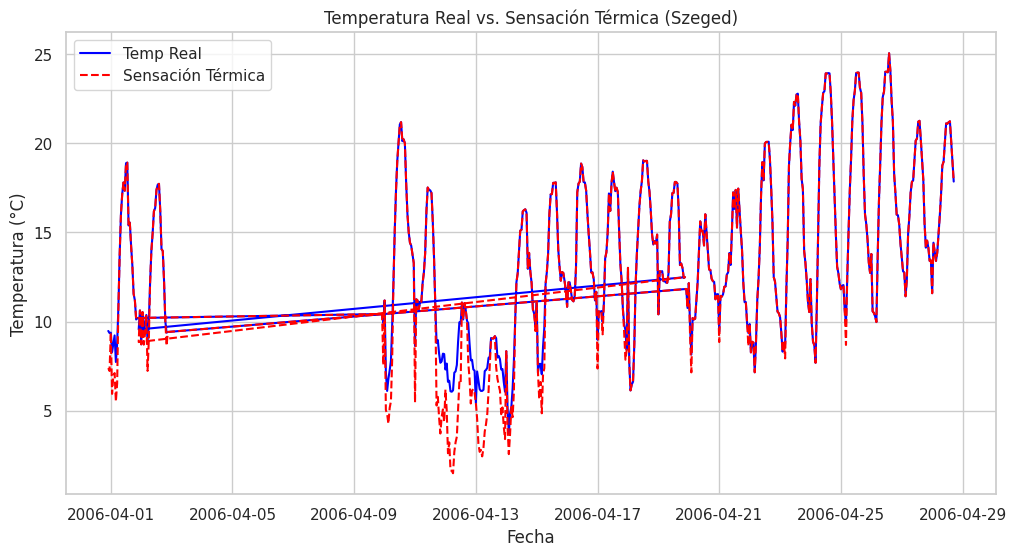

In [8]:
df_sample = df.iloc[:500]

plt.figure()
plt.plot(df_sample.index, df_sample["Temperature (C)"], label="Temp Real", color="blue")
plt.plot(df_sample.index, df_sample["Apparent Temperature (C)"], label="Sensación Térmica", color="red", linestyle="--")

plt.title("Temperatura Real vs. Sensación Térmica (Szeged)")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()


## 4) Remuestreo (Resampling)
El dataset es horario; para observar tendencias de una década, calculamos promedios **anuales**.

In [9]:
# Promedios anuales (Temperatura y Humedad)
df_yearly = df[["Temperature (C)", "Humidity"]].resample("Y").mean()
df_yearly.head()


/tmp/ipykernel_328169/982729502.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df[["Temperature (C)", "Humidity"]].resample("Y").mean()


,Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,0.890000
2006-12-31 00:00:00+00:00,11.215225,0.767349
2007-12-31 00:00:00+00:00,12.134677,0.689647
2008-12-31 00:00:00+00:00,12.161819,0.701239
2009-12-31 00:00:00+00:00,12.302080,0.706925


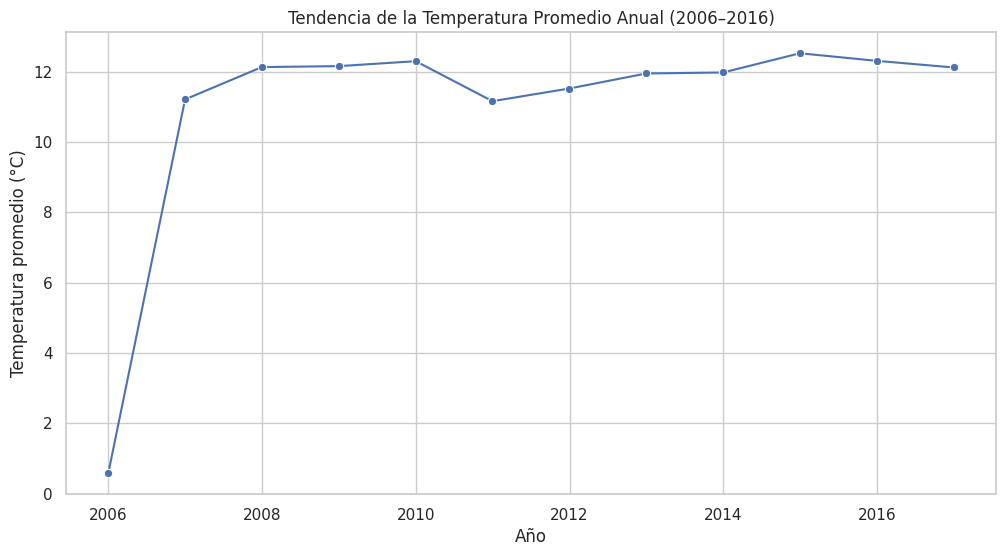

In [10]:
sns.lineplot(data=df_yearly, x=df_yearly.index, y="Temperature (C)", marker="o")
plt.title("Tendencia de la Temperatura Promedio Anual (2006–2016)")
plt.xlabel("Año")
plt.ylabel("Temperatura promedio (°C)")
plt.show()


## 5) Correlación: Temperatura vs Humedad
Validamos visualmente la relación entre temperatura y humedad con regresión. Además calculamos el coeficiente de correlación.

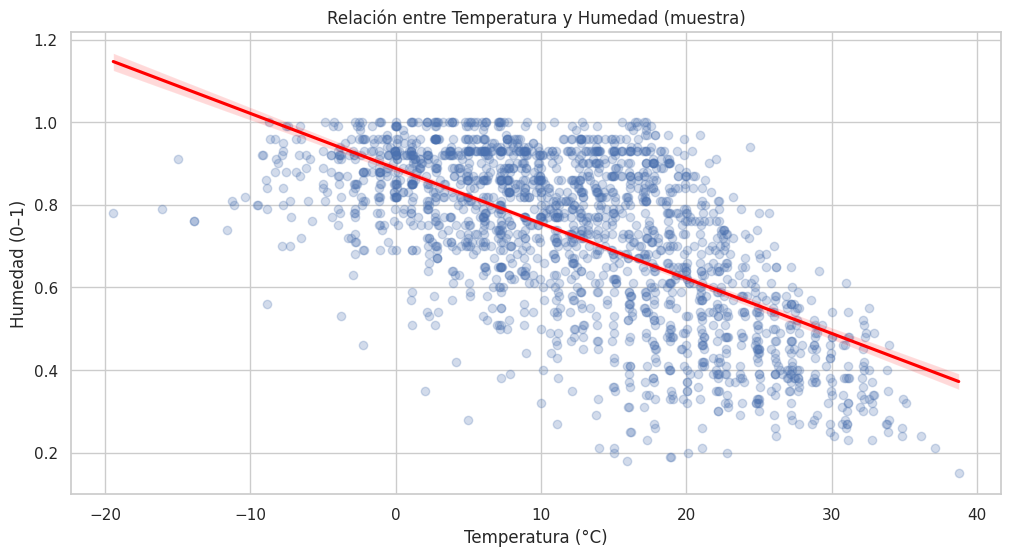

np.float64(-0.6321115127243773)

In [11]:
# Gráfico de correlación (muestra aleatoria para rendimiento/claridad)
sns.regplot(
    x="Temperature (C)",
    y="Humidity",
    data=df.sample(2000, random_state=42),
    scatter_kws={"alpha": 0.25},
    line_kws={"color": "red"}
)

plt.title("Relación entre Temperatura y Humedad (muestra)")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (0–1)")
plt.show()

corr = df["Temperature (C)"].corr(df["Humidity"])
corr


## 6) Gráfico extra: Histograma de Wind Speed (km/h)
Histograma para entender qué tan ventosa es la región y marcar promedio/mediana.

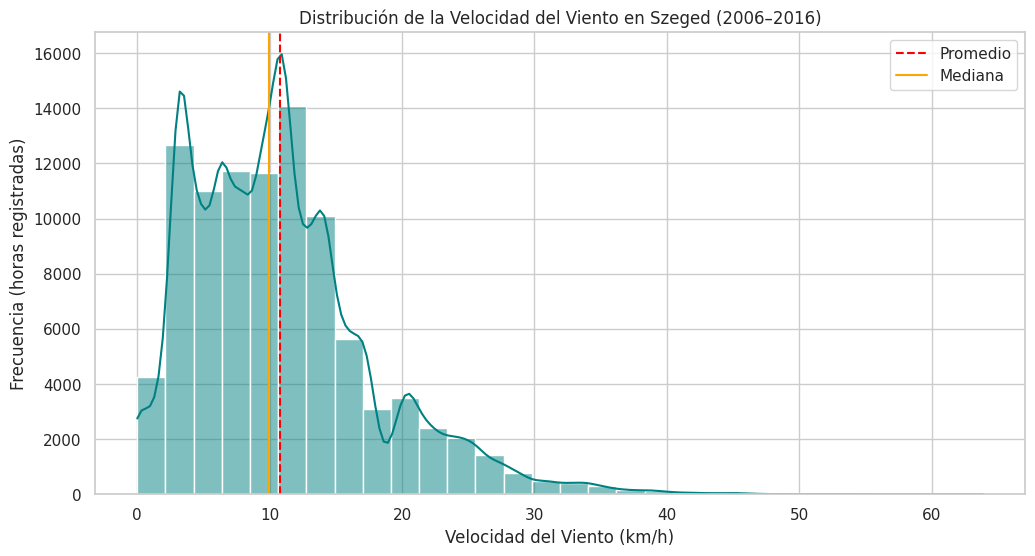

In [12]:
sns.histplot(df["Wind Speed (km/h)"], bins=30, kde=True, color="teal")

plt.axvline(df["Wind Speed (km/h)"].mean(), color="red", linestyle="--", label="Promedio")
plt.axvline(df["Wind Speed (km/h)"].median(), color="orange", linestyle="-", label="Mediana")

plt.title("Distribución de la Velocidad del Viento en Szeged (2006–2016)")
plt.xlabel("Velocidad del Viento (km/h)")
plt.ylabel("Frecuencia (horas registradas)")
plt.legend()
plt.show()


## 7) Preguntas del estudiante (respuestas)
**1) Observación:** ¿Cuándo la sensación térmica cae muy por debajo de la temperatura real? ¿Qué variable lo causa?
- Suele ocurrir en periodos con **viento alto** (aumenta el enfriamiento por convección) y/o en condiciones donde cambia la humedad. La variable más directa para una caída fuerte de la sensación térmica suele ser **Wind Speed (km/h)** (y también Wind Bearing/ráfagas cuando existen).

**2) Técnica:** Si quisiéramos promedio mensual, ¿qué letra va en `.resample()`?
- Para promedio **mensual** se usa `resample('M')`.

**3) Lógica:** ¿Por qué es útil para una empresa eléctrica analizar promedios anuales y no hora por hora?
- El promedio anual reduce el ruido y permite ver **tendencias** (cambio de clima, picos de calor/frío a gran escala) que impactan planeación, capacidad instalada y mantenimiento. Los datos hora por hora son útiles para operación diaria, pero no para ver la tendencia de una década.

## 8) Conclusión escrita (para entregar)
A partir de los registros horarios de Szeged (2006–2016), se observa que la **temperatura** y la **sensación térmica** siguen una relación positiva, pero en ciertos periodos la sensación térmica cae por debajo de la temperatura real, lo cual es consistente con el efecto del **viento** y la interacción con la humedad. Además, la relación entre **temperatura y humedad** muestra un patrón **inverso**: cuando la temperatura aumenta, la humedad tiende a disminuir, lo que se refleja en la tendencia y en el valor de correlación calculado. Finalmente, el histograma de **velocidad del viento** sugiere que predominan vientos moderados, con eventos menos frecuentes de mayor intensidad, importantes para interpretar cambios en la sensación térmica y para aplicaciones de planeación (infraestructura, demanda energética y confort térmico).